In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv("D:\\Assignments\\insaid\\Fraud.csv")

In [4]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [6]:
data.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

# visualization

In [7]:
t_f=data[['type','isFraud']].value_counts().reset_index(name='count')
t_f

,type,isFraud,count
0,CASH_OUT,0,2233384
1,PAYMENT,0,2151495
2,CASH_IN,0,1399284
3,TRANSFER,0,528812
4,DEBIT,0,41432
5,CASH_OUT,1,4116
6,TRANSFER,1,4097


<BarContainer object of 7 artists>

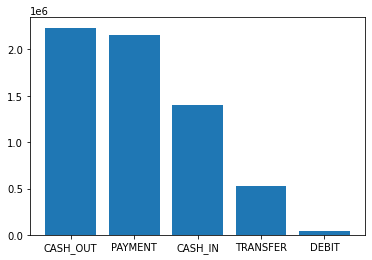

In [8]:
plt.bar(t_f['type'],t_f['count'])

--cheaking balance dataset

C:\Users\phani\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='isFraud', ylabel='count'>

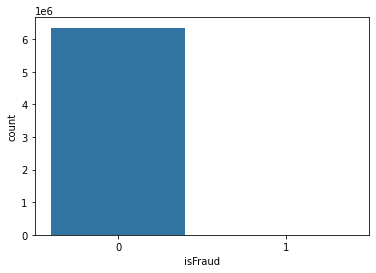

In [9]:
sns.countplot(data['isFraud'])

--cheaking correlation

In [10]:
d_c=data.corr()

In [11]:
d_c

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


<AxesSubplot:>

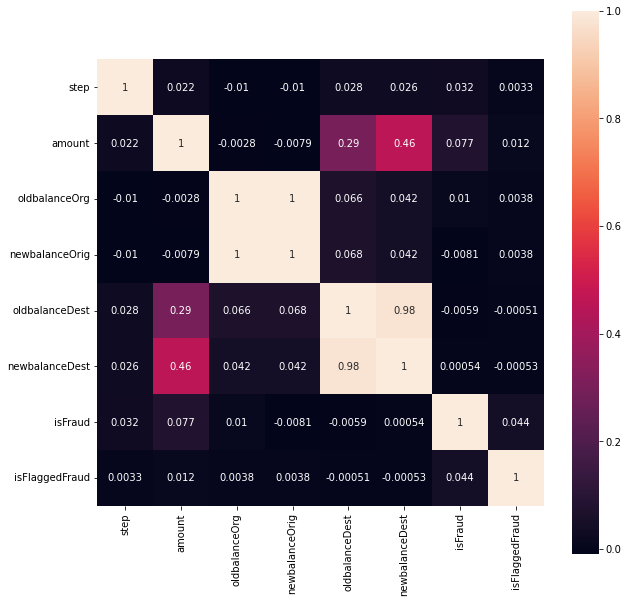

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(d_c,annot=True,square=True)

In [13]:
data.shape

(6362620, 11)

--cheaking the no of valid transations

In [14]:
len(data[data['isFraud']==0])#valid transations

6354407

In [15]:
len(data[data['isFraud']==1])

8213

#converting columns

In [16]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()


In [17]:
data['type']=le.fit_transform(data['type'])
data['nameOrig']=le.fit_transform(data['nameOrig'])
data['nameDest']=le.fit_transform(data['nameDest'])

In [18]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,757869,170136.0,160296.36,1662094,0.0,0.0,0,0
1,1,3,1864.28,2188998,21249.0,19384.72,1733924,0.0,0.0,0,0
2,1,4,181.00,1002156,181.0,0.00,439685,0.0,0.0,1,0
3,1,1,181.00,5828262,181.0,0.00,391696,21182.0,0.0,1,0
4,1,3,11668.14,3445981,41554.0,29885.86,828919,0.0,0.0,0,0


-independent and dependent

In [19]:
x=data.iloc[:,:9]
y=data.iloc[:,9]

In [49]:
x.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest
0,1,3,9839.64,757869,170136.0,160296.36,1662094,0.0,0.0
1,1,3,1864.28,2188998,21249.0,19384.72,1733924,0.0,0.0
2,1,4,181.00,1002156,181.0,0.00,439685,0.0,0.0
3,1,1,181.00,5828262,181.0,0.00,391696,21182.0,0.0
4,1,3,11668.14,3445981,41554.0,29885.86,828919,0.0,0.0


In [50]:
y.head()

0    0
1    0
2    1
3    1
4    0
Name: isFraud, dtype: int64

# datasize

In [51]:
data.shape

(6362620, 11)

# Split and model 

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)

In [32]:
x.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest
0,1,3,9839.64,757869,170136.0,160296.36,1662094,0.0,0.0
1,1,3,1864.28,2188998,21249.0,19384.72,1733924,0.0,0.0
2,1,4,181.00,1002156,181.0,0.00,439685,0.0,0.0
3,1,1,181.00,5828262,181.0,0.00,391696,21182.0,0.0
4,1,3,11668.14,3445981,41554.0,29885.86,828919,0.0,0.0


# Artificaial neauralnetwork

In [21]:
import keras
from keras.models import Sequential
from keras.layers import Dense ,Dropout

--layer creations 

In [22]:
model=Sequential()

In [23]:
model.add(Dense(units=15,activation='relu',kernel_initializer='glorot_uniform',input_dim=9))

In [24]:
model.add(Dropout(rate=0.1))

In [25]:
model.add(Dense(units=100,activation='relu',kernel_initializer='glorot_uniform'))
model.add(Dropout(rate=0.1))

In [26]:
model.add(Dense(units=50,activation='relu',kernel_initializer='glorot_uniform'))
model.add(Dropout(rate=0.1))

In [27]:
model.add(Dense(units=20,activation='relu',kernel_initializer='glorot_uniform'))
model.add(Dropout(rate=0.1))

In [29]:
model.add(Dense(units=1,activation='sigmoid'))

--compiler

In [30]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

--data.fit

In [33]:
model.fit(x_train,y_train,batch_size=32,epochs=10)

Epoch 1/10
133218/133218 [==============================] - 253s 2ms/step - loss: 8.3195 - accuracy: 0.9986
Epoch 2/10
133218/133218 [==============================] - 248s 2ms/step - loss: 0.0637 - accuracy: 0.9987
Epoch 3/10
133218/133218 [==============================] - 251s 2ms/step - loss: 1.3692 - accuracy: 0.9987
Epoch 4/10
133218/133218 [==============================] - 250s 2ms/step - loss: 4.6638 - accuracy: 0.9987
Epoch 5/10
133218/133218 [==============================] - 246s 2ms/step - loss: 3.3476 - accuracy: 0.9987
Epoch 6/10
133218/133218 [==============================] - 248s 2ms/step - loss: 0.0757 - accuracy: 0.9987
Epoch 7/10
133218/133218 [==============================] - 248s 2ms/step - loss: 0.2333 - accuracy: 0.9987
Epoch 8/10
133218/133218 [==============================] - 246s 2ms/step - loss: 0.0260 - accuracy: 0.9987
Epoch 9/10
133218/133218 [==============================] - 248s 2ms/step - loss: 0.5517 - accuracy: 0.9987
Epoch 10/10
133218/133218 [=

In [34]:
y_pred=model.predict(x_test)

In [43]:
y_pred=y_pred>0.5

In [44]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

# datapredection 

In [37]:
x_train.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest
1186641,132,0,186994.49,4119826,4980.0,191974.49,188958,2565463.66,2225790.42
1199598,133,1,86377.61,4069553,31480.0,0.00,214765,0.00,86377.61
1185636,132,1,215489.19,1222487,21518.0,0.00,414463,6345756.55,6794954.89
6211424,588,4,697319.21,627946,25493.0,0.00,345294,2150239.95,2847559.16
4452703,323,3,59243.58,3366223,29879.0,0.00,1984105,0.00,0.00


In [52]:
qurey=np.array([1,2,181,5475125,4680,54245,181,165542,24512])
qurey=qurey.reshape(1,9)
y_new=model.predict(qurey)
y_new

array([[0.00137457]], dtype=float32)

# cheacking accurecy score

In [46]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [45]:
print(confusion_matrix(y_pred,y_test))

[[2096999    2666]
 [      0       0]]


<AxesSubplot:>

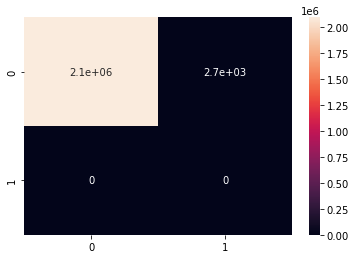

In [47]:
sns.heatmap(confusion_matrix(y_pred,y_test),annot=True)

In [48]:
print('Accuracy Score :',accuracy_score(y_test,y_pred))
print('Classification Report :')
print(classification_report(y_test,y_pred))

Accuracy Score : 0.99873027363889
Classification Report :


C:\Users\phani\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\phani\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2096999
           1       0.00      0.00      0.00      2666

    accuracy                           1.00   2099665
   macro avg       0.50      0.50      0.50   2099665
weighted avg       1.00      1.00      1.00   2099665



C:\Users\phani\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
